<h1>Introducción a matplotlib</h1>

En este primer notebook, vamos a centrarnos en entender la filosofía de trabajo de matplotlib y cómo se debe trabajar con el módulo. Aunque las funciones más importantes ofrecidas por matplotlib se verán en siguientes notebooks, en este utilizaremos algunas de las más básicas.

<h2>Preparación del entorno para matplotlib</h2>

Para que <b>matplotlib</b> pueda renderizar gráficos dentro de un notebook, es necesario, ejecutar de forma previa el siguiente comando.

In [1]:
%matplotlib inline

Una vez hemos asegurado que la renderización de los gráficos se realizará correctamente en nuestro notebook, podemos pasar a cargar el paquete. Aunque matplotlib incluye varios submódulos (pylab, cbook...), en este curso nos vamos a centrar en el submódulo de visualización <b>pyplot</b>.<br/><br/>
Aunque no es obligatorio, es recomendable utilizar para la carga del paquete en nuestro entorno el alias <b>plt</b>. La mayor parte de la documentación, libros y ejemplos online que se pueden encontrar siguen este estándar "de facto" (como ocurre en otros paquete como NumPy con np o Pandas con pd).

In [2]:
import matplotlib.pyplot as plt

<h2>Nuestro primer gráfico</h2>

Creemos nuestro primer gráfico. Vamos a crear un gráfico de línea representando la función f(x) = x**2. Podemos hacerlo mediante la función <b>plot</b>, la más básica de las ofrecidas por matplotlib.

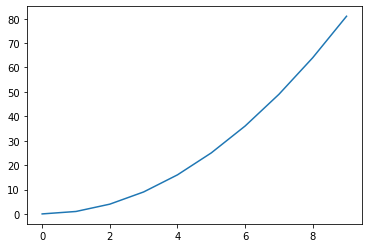

In [3]:
x_values = range(10)
y_values = [value ** 2 for value in x_values]
plt.plot(x_values, y_values)

<h2>Entendiendo la salida de la función plot</h2>

Podemos ver que la salida contiene dos elementos:

<ul>
<li>Primero un objeto gráfico de tipo Line2D representado por la cadena entre corchetes.</li>
<li>Segundo la representación gráfica de dicho objeto.</li>
</ul>

Esta salida doble se da por el modo de funcionamiento <b>interactivo</b> establecido actualmente para matplotlib. El modo interactivo, hace que el paquete lleve a cabo el renderizado de forma automática (sin llamar a la función <b>show</b> al finalizar la ejecución de un bloque de código que incluya y llamadas a funciones del módulo. Esto hace que la salida obtenida dependa del conjunto de operaciones ejecutadas lo que, en consolas interactivas como notebooks, Spyder o Rodeo, en las que tenemos control absoluto sobre el conjunto de instrucciones que enviamos "en bloque" a la consola pueda ser interesante. 

Sin embargo el modo interactivo de matplotlib es configurable. Si no se especifica nada, por defecto se establecerá en función del tipo de entorno que estemos utilizando.

<ul>
<li><b>Interactvo:</b> En notebook e IDEs gráficos como Rodeo o Spyder.</li>
<li><b>No interactivo:</b> En consolas de comandos como "python" o "ipython" y en ejecución de scripts .py completos</li>
</ul>

Para comprobar el modo de funcionamiento establecido y modificarlo, matplotlib nos da tres funciones.

In [4]:
# Comprobar el modo de funcionamiento de matplotlib
print(plt.isinteractive())

# Desactivar el modo interactivo
plt.ioff()
print(plt.isinteractive())

# Activar el modo interactivo
plt.ion()
print(plt.isinteractive())

True
False
True


Probemos a generar el gráfico anterior en modo no interactivo.

False


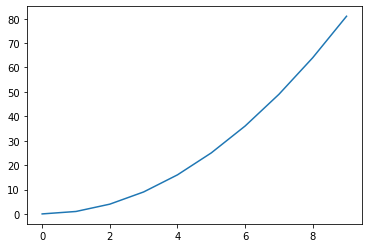

In [5]:
plt.ioff()
print(plt.isinteractive())
plt.plot(x_values,y_values)

¿Qué ha pasado? Se debería haber visualizado sólo el elemento gráfico y no el renderizado. Sin embargo vemos la misma respuesta.

La explicación a este funcionamiento "anómalo" la tenemos en el IDE que estamos utilizando. Los Notebooks (al menos en su versión actual) hacen funcionar matplotlib en modo interactivo independientemente de lo que establezcamos nosotros en la configuración. Sin embargo, el funcionamiento de estos parámetros es correcto en consola e IDEs más tradicionales.

<h2>Un gráfico con más componentes</h2>

Para comprender cuál es la filosofía de trabajo con matplotlib vamos a tratar de crear un gráfico un poco más completo. Este gráfico tendrá:

<ul>
<li>Una serie que contenga la función seno.</li>
<li>Una serie que contenga la función coseno.</li>
<li>Nombres en ambos ejes.</li>
<li>Una leyenda que indique qué linea representa cada función</li>
</ul>

Para facilitar la creación del set de datos, vamos a utilizar NumPy.

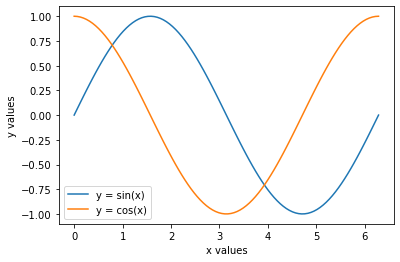

In [6]:
import numpy as np

# Creamos nuestro set de datos
x_values = np.linspace(0, 2 * np.pi, 100)
sin_y_values = np.sin(x_values)
cos_y_values = np.cos(x_values)

# Añadimos las serie e la función seno
sin_line, = plt.plot(x_values,sin_y_values)
cos_line, = plt.plot(x_values,cos_y_values)
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend([sin_line, cos_line], ['y = sin(x)', 'y = cos(x)'])
plt.show()

Podemos ver, por tanto, que matplotlib en términos de funcionamiento se sitúa en un punto intermedio entre ggplot2 y base-r. 

Tenemos una llamada a una función (con diversos parámetros) por cada componentes que queramos ir añadiendo al gráfico (en lugar de un framework basado en componentes), pero estas funciones van modificando un objeto gráfico interno que no se renderiza (en función de la parametrización de "modo interactivo") hasta el momento en el que el usuario creador del gráfico decide (en lugar de crear una imagen e ir modificándola posteriormente).